### Collecting cruise ctds

- Start with nc-files output by the parser
- Bin and conatenate

In [365]:
import xarray as xr
from oceanograpy.io import cnv
import importlib as imp
from matplotlib import pyplot as plt

In [366]:
### Make two test files we can work with

In [367]:
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [542]:

in_fns = ['Sta0001.cnv', 'Sta0002.cnv']
out_dir = './test_output/'
ncfiles = []
for in_fn in in_fns:
    d = cnv.read_cnv(in_fn)
    ncfile = out_dir + in_fn.replace('.cnv', '.nc')
    #dbin = cnv.bin_to_pressure(d, dp = 1)
    #dbin.to_netcdf(ncfile, mode = 'w')
    d.to_netcdf(ncfile, mode = 'w')
    ncfiles += [ncfile]

###  Concatenate/ collect

In [444]:
in_fn

'Sta0002.cnv'

In [454]:
d = xr.open_dataset('test_output/Sta0001.nc')

In [504]:
h = cnv.read_header(in_fn)

In [512]:
'ship' in h

True

In [499]:
' '.join(str.split()[2:])

'PIRATA-FR26'

In [515]:
d = cnv.read_cnv('Sta0001.cnv')

In [516]:
d

<xarray.Dataset>
Dimensions:      (scan_count: 3686)
Coordinates:
  * scan_count   (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES         (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1        (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2        (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    c0S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...           ...
    LATITUDE     (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
Attributes:
    binned:               no
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0001.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000
    station:              0001

In [518]:
d.data_vars

Data variables:
    PRES         (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1        (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2        (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    c0S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    CDOM1        (scan_count) float64 0.1099 0.1099 0.1099 ... 0.1138 0.1137
    CHLA1        (scan_count) float64 0.2282 0.2266 0.2254 ... 0.0441 0.0446
    ATTN1        (scan_count) float64 0.2889 0.2889 0.2889 ... 0.2433 0.2436
    LATITUDE     (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (scan_count) float64 30.12 30.12 

In [522]:
d.station

'0001'

In [523]:
d['STATION'] = ('TIME', [d.station])

In [527]:
del d.attrs['station']

In [528]:
d

<xarray.Dataset>
Dimensions:      (scan_count: 3686, TIME: 1)
Coordinates:
  * scan_count   (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Dimensions without coordinates: TIME
Data variables: (12/16)
    PRES         (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1        (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2        (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    c0S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...           ...
    LONGITUDE    (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
    STATION      (TIME) <U4 '0001'
Attributes:
    binned:               no
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0001.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000

In [580]:
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [581]:
db = cnv.bin_to_pressure(d)
print(d.data_vars)
print(db.data_vars)

Data variables:
    PRES         (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1        (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2        (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    c0S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    CDOM1        (scan_count) float64 0.1099 0.1099 0.1099 ... 0.1138 0.1137
    CHLA1        (scan_count) float64 0.2282 0.2266 0.2254 ... 0.0441 0.0446
    ATTN1        (scan_count) float64 0.2889 0.2889 0.2889 ... 0.2433 0.2436
    LATITUDE     (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (scan_count) float64 30.12 30.12 

In [480]:
d

<xarray.Dataset>
Dimensions:      (scan_count: 3686)
Coordinates:
  * scan_count   (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES         (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1        (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2        (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    c0S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...           ...
    LATITUDE     (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
Attributes:
    binned:               no
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0001.cnv
    SBE flags applied:    yes
    profile_direction:    downcast

In [578]:
aa = [1, 2]
N['aa'] = (('TIME'), aa) 

In [579]:
N

<xarray.Dataset>
Dimensions:      (PRES: 148, TIME: 2, STATION: 1)
Coordinates:
  * PRES         (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
  * TIME         (TIME) float64 1.096e+04 1.096e+04
  * STATION      (STATION) <U4 '0001'
    aa           (TIME) int64 1 2
Data variables: (12/14)
    TEMP1        (PRES, TIME) float64 -1.295 -1.295 -1.296 ... -0.4862 -0.4862
    TEMP2        (PRES, TIME) float64 -1.303 -1.303 -1.298 ... -0.4865 -0.4865
    c0S_m        (PRES, TIME) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (PRES, TIME) float64 2.436 2.436 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (PRES, TIME) float64 383.5 383.5 383.9 ... 279.9 280.0 280.0
    CDOM1        (PRES, TIME) float64 0.1101 0.1101 0.1109 ... 0.1142 0.1142
    ...           ...
    LATITUDE     (PRES, TIME) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (PRES, TIME) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (PRES, TIME) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (PRES, TIME) float64 30.13 30.13 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (PRES, TIME) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (PRES, TIME) float64 1.096e+04 1.096e+04 ... 1.096e+04
Attributes:
    binned:               1 dbar
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0002.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000
    station:              0001

In [575]:
N

<xarray.Dataset>
Dimensions:      (PRES: 148, TIME: 2, STATION: 1)
Coordinates:
  * PRES         (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
  * TIME         (TIME) float64 1.096e+04 1.096e+04
  * STATION      (STATION) <U4 '0001'
Data variables: (12/14)
    TEMP1        (PRES, TIME) float64 -1.295 -1.295 -1.296 ... -0.4862 -0.4862
    TEMP2        (PRES, TIME) float64 -1.303 -1.303 -1.298 ... -0.4865 -0.4865
    c0S_m        (PRES, TIME) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (PRES, TIME) float64 2.436 2.436 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (PRES, TIME) float64 383.5 383.5 383.9 ... 279.9 280.0 280.0
    CDOM1        (PRES, TIME) float64 0.1101 0.1101 0.1109 ... 0.1142 0.1142
    ...           ...
    LATITUDE     (PRES, TIME) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE    (PRES, TIME) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1        (PRES, TIME) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (PRES, TIME) float64 30.13 30.13 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (PRES, TIME) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (PRES, TIME) float64 1.096e+04 1.096e+04 ... 1.096e+04
Attributes:
    binned:               1 dbar
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0002.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000
    station:              0001

In [583]:
N = xr.Dataset(coords={'TIME': [1, 2, 3]})
new_data = [10, 20, 30]
N['new_data'] = (('TIME'), [new_data])

ValueError: Variable 'new_data': Could not convert tuple of form (dims, data[, attrs, encoding]): ('TIME', [[10, 20, 30]]) to Variable.

In [655]:
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [656]:
N = cnv.join_cruise('./test_output/', verbose=True)

Loaded 2 profiles from netcdf files: ['./test_output/Sta0002.nc', './test_output/Sta0001.nc']
Binning all profiles to 1 dbar.


In [657]:
N

<xarray.Dataset>
Dimensions:      (PRES: 148, TIME: 2)
Coordinates:
  * PRES         (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
  * TIME         (TIME) float64 1.096e+04 1.096e+04
Data variables: (12/16)
    TEMP1        (PRES, TIME) float64 -1.295 -1.295 -1.296 ... -0.4862 -0.4862
    TEMP2        (PRES, TIME) float64 -1.303 -1.303 -1.298 ... -0.4865 -0.4865
    c0S_m        (PRES, TIME) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (PRES, TIME) float64 2.436 2.436 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (PRES, TIME) float64 383.5 383.5 383.9 ... 279.9 280.0 280.0
    CDOM1        (PRES, TIME) float64 0.1101 0.1101 0.1109 ... 0.1142 0.1142
    ...           ...
    PSAL1        (PRES, TIME) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (PRES, TIME) float64 30.13 30.13 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (PRES, TIME) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (PRES, TIME) float64 1.096e+04 1.096e+04 ... 1.096e+04
    STATION      (TIME) <U4 '0001' '0001'
    CRUISE       <U9 'TEST 2000'
Attributes:
    binned:               1 dbar
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0002.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000
    featureType:          TrajectoryProfile

In [636]:
N.CRUISE.astype('S1')

<xarray.DataArray 'CRUISE' ()>
array(b'T', dtype='|S1')
Attributes:
    long_name:  Cruise ID
    cf_role:    trajectory_id

In [654]:
N

<xarray.Dataset>
Dimensions:      (PRES: 148, TIME: 2)
Coordinates:
  * PRES         (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
  * TIME         (TIME) float64 1.096e+04 1.096e+04
Data variables: (12/16)
    TEMP1        (PRES, TIME) float64 -1.295 -1.295 -1.296 ... -0.4862 -0.4862
    TEMP2        (PRES, TIME) float64 -1.303 -1.303 -1.298 ... -0.4865 -0.4865
    c0S_m        (PRES, TIME) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    c1S_m        (PRES, TIME) float64 2.436 2.436 2.437 ... 2.805 2.805 2.805
    sbox0Mm_Kg   (PRES, TIME) float64 383.5 383.5 383.9 ... 279.9 280.0 280.0
    CDOM1        (PRES, TIME) float64 0.1101 0.1101 0.1109 ... 0.1142 0.1142
    ...           ...
    PSAL1        (PRES, TIME) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2        (PRES, TIME) float64 30.13 30.13 30.12 ... 34.15 34.15 34.15
    SBE_FLAG     (PRES, TIME) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TIME_SAMPLE  (PRES, TIME) float64 1.096e+04 1.096e+04 ... 1.096e+04
    STATION      (TIME) <U4 '0001' '0001'
    CRUISE       <U9 'TEST 2000'
Attributes:
    binned:               1 dbar
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0002.cnv
    SBE flags applied:    yes
    profile_direction:    downcast
    ship:                 Kronprins Haakon [9566] ""
    cruise:               TEST 2000
    featureType:          TrajectoryProfile

In [647]:

# Create a sample dataset
s = xr.Dataset()

# Create a string variable
s['a'] = 'heeeiii'

# Convert the string variable to char type
s['a'] = s['a'].astype('S')

In [653]:
N.TEMP1 

<xarray.DataArray 'TEMP1' (PRES: 148, TIME: 2)>
array([[-1.29452103, -1.29452103],
       [-1.29645424, -1.29645424],
       [-1.28837936, -1.28837936],
       [-1.29672754, -1.29672754],
       [-1.29063008, -1.29063008],
       [-1.30295595, -1.30295595],
       [-1.28401606, -1.28401606],
       [-1.29375728, -1.29375728],
       [-1.29185767, -1.29185767],
       [-1.30899522, -1.30899522],
       [-1.29540335, -1.29540335],
       [-1.32324495, -1.32324495],
       [-1.31235598, -1.31235598],
       [-1.35494897, -1.35494897],
       [-1.37645139, -1.37645139],
       [-1.38646854, -1.38646854],
       [-1.39015112, -1.39015112],
       [-1.39091196, -1.39091196],
       [-1.39086079, -1.39086079],
       [-1.39214277, -1.39214277],
...
       [-0.60881834, -0.60881834],
       [-0.58968207, -0.58968207],
       [-0.56721446, -0.56721446],
       [-0.55814696, -0.55814696],
       [-0.55652219, -0.55652219],
       [-0.55501916, -0.55501916],
       [-0.55193503, -0.55193503],
       [-0.53919135, -0.53919135],
       [-0.53310241, -0.53310241],
       [-0.53097362, -0.53097362],
       [-0.52747815, -0.52747815],
       [-0.52266609, -0.52266609],
       [-0.51739955, -0.51739955],
       [-0.51550096, -0.51550096],
       [-0.51045173, -0.51045173],
       [-0.50078588, -0.50078588],
       [-0.49649282, -0.49649282],
       [-0.49194473, -0.49194473],
       [-0.48600576, -0.48600576],
       [-0.48616727, -0.48616727]])
Coordinates:
  * PRES     (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
  * TIME     (TIME) float64 1.096e+04 1.096e+04
Attributes:
    _FillValue:               nan
    units:                    degree_Celsius
    sensor_serial_number:     5884
    sensor_calibration_date:  14-Oct-22

In [637]:
N['CRUISE'] = N.CRUISE.astype('|S1')


In [640]:
N.CRUISE

<xarray.DataArray 'CRUISE' ()>
array(b'T', dtype='|S1')
Attributes:
    long_name:  Cruise ID
    cf_role:    trajectory_id

In [615]:
    N['CRUISE'] = ((), N.cruise, {'long_name':'Cruise ID', 'cf_role':'trajectoryProfile', 'dtype': 'S1'}) 


In [635]:
N.CRUISE

<xarray.DataArray 'CRUISE' ()>
array(b'T', dtype='|S1')
Attributes:
    long_name:  Cruise ID
    cf_role:    trajectory_id

In [614]:
N.STATION.astype('S1')

<xarray.DataArray 'STATION' (TIME: 2)>
array([b'0', b'0'], dtype='|S1')
Coordinates:
  * TIME     (TIME) float64 1.096e+04 1.096e+04
Attributes:
    long_name:  CTD station ID

In [597]:
            N.TIME.attrs = {'units' : N.TIME_SAMPLE.units,
                            'standard_name' : 'time',
                            'axis':'T',
                            'long_name':'Average time of measurement'}

In [559]:
N.assign?

Signature:
N.assign(
    variables: 'Mapping[Any, Any] | None' = None,
    **variables_kwargs: 'Any',
) -> 'T_Dataset'
Docstring:
Assign new data variables to a Dataset, returning a new object
with all the original variables in addition to the new ones.

Parameters
----------
variables : mapping of hashable to Any
    Mapping from variables names to the new values. If the new values
    are callable, they are computed on the Dataset and assigned to new
    data variables. If the values are not callable, (e.g. a DataArray,
    scalar, or array), they are simply assigned.
**variables_kwargs
    The keyword arguments form of ``variables``.
    One of variables or variables_kwargs must be provided.

Returns
-------
ds : Dataset
    A new Dataset with the new variables in addition to all the
    existing variables.

Notes
-----
Since ``kwargs`` is a dictionary, the order of your arguments may not
be preserved, and so the order of the new variables is not well
defined. Assigning multiple var

In [546]:
'cruise' in N.attrs

True

In [490]:
str = '** Cruise: PIRATA-FR26'
str[(str.rfind(': ')+2):]

'PIRATA-FR26'

In [484]:
mp_str = line.split()[-1]

NameError: name 'line' is not defined

In [472]:
d.history

'2000-01-01: Start of data collection.\n2023-10-05: Processed using SBE software (details in "SBE_processing").'

In [470]:
N.history

'2000-01-01: Start of data collection.\n2023-10-05: Processed using SBE software (details in "SBE_processing").'

In [466]:
import pandas as pd

In [469]:
pd.Timestamp.now().strftime('%Y-%m-%d')

'2023-11-13'

In [463]:
import datetime

In [424]:
N[0].data_vars

Data variables:
    TEMP1       (PRES) float64 -1.295 -1.296 -1.288 ... -0.4919 -0.486 -0.4862
    TEMP2       (PRES) float64 -1.303 -1.298 -1.289 ... -0.4912 -0.4862 -0.4865
    c0S_m       (PRES) float64 2.437 2.437 2.437 2.437 ... 2.804 2.805 2.805
    c1S_m       (PRES) float64 2.436 2.437 2.437 2.437 ... 2.804 2.805 2.805
    sbox0Mm_Kg  (PRES) float64 383.5 383.9 383.1 383.7 ... 280.1 279.9 280.0
    CDOM1       (PRES) float64 0.1101 0.1109 0.1127 ... 0.1136 0.1132 0.1142
    CHLA1       (PRES) float64 0.2357 0.228 0.2281 ... 0.0425 0.04394 0.03543
    ATTN1       (PRES) float64 0.2893 0.289 0.2884 ... 0.2484 0.246 0.2464
    LATITUDE    (PRES) float64 81.27 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE   (PRES) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786 -9.786
    PSAL1       (PRES) float64 30.12 30.12 30.12 30.12 ... 34.14 34.15 34.15
    PSAL2       (PRES) float64 30.13 30.12 30.12 30.12 ... 34.14 34.15 34.15
    SBE_FLAG    (PRES) float64 0.0 0.0 0.0 0.0 0.0 0.0 .

In [293]:
first = True
for ncfile in ncfiles:
    if first:
        N = xr.open_dataset(ncfile)
        N = N.assign_coords({'TIME':N.TIME_SAMPLE.mean()})
        first = False
    # If not, *add* da to N
    else:
        n = xr.open_dataset(ncfile)
        n = n.assign_coords({'TIME':N.TIME_SAMPLE.mean()})

        N = xr.concat([N, n], dim = 'TIME')
        
    N = N.transpose() # Transpose so hat variables are (TIM, PRES) rather than (PRES, TIM)
    #- want time first


In [227]:
cnv.bin_to_pressure

<xarray.Dataset>
Dimensions:      (PRES: 148)
Coordinates:
  * PRES         (PRES) float64 3.0 4.0 5.0 6.0 7.0 ... 147.0 148.0 149.0 150.0
Data variables: (12/14)
    TEMP1        (PRES) float64 ...
    TEMP2        (PRES) float64 ...
    c0S_m        (PRES) float64 ...
    c1S_m        (PRES) float64 ...
    sbox0Mm_Kg   (PRES) float64 ...
    CDOM1        (PRES) float64 ...
    ...           ...
    LATITUDE     (PRES) float64 ...
    LONGITUDE    (PRES) float64 ...
    PSAL1        (PRES) float64 ...
    PSAL2        (PRES) float64 ...
    SBE_FLAG     (PRES) float64 ...
    TIME_SAMPLE  (PRES) datetime64[ns] ...
Attributes:
    history:              2000-01-01: Start of data collection.\n2023-10-05: ...
    SBE_processing:       SBE SOFTWARE PROCESSING STEPS (extracted from .cnv ...
    SBE_processing_date:  2023-10-05T12:14:33Z
    source_files:         STA0001.HEX, STA0001.XMLCON -> Sta0001.cnv
    SBE flags applied:    yes
    profile_direction:    downcast

In [347]:
n1 = xr.open_dataset(ncfiles[0])
n2 = xr.open_dataset(ncfiles[1])
ncfiles = [n1, n2]

In [348]:
for vars in n1.keys():
    #print(vars)
    print(vars, n1[vars].identical(n2[vars]))

TEMP1 False
TEMP2 False
c0S_m True
c1S_m False
sbox0Mm_Kg True
CDOM1 True
CHLA1 True
ATTN1 True
LATITUDE True
LONGITUDE True
PSAL1 True
PSAL2 True
SBE_FLAG True
TIME_SAMPLE False


AttributeError: 'tuple' object has no attribute 'TEMP2'

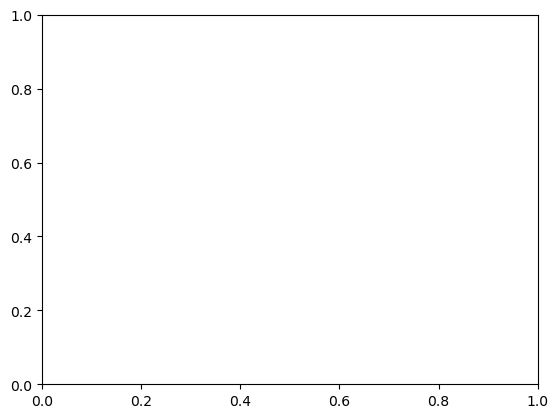

In [351]:
fig, ax = plt.subplots()
ax.plot(N.TEMP2, -N.PRES)

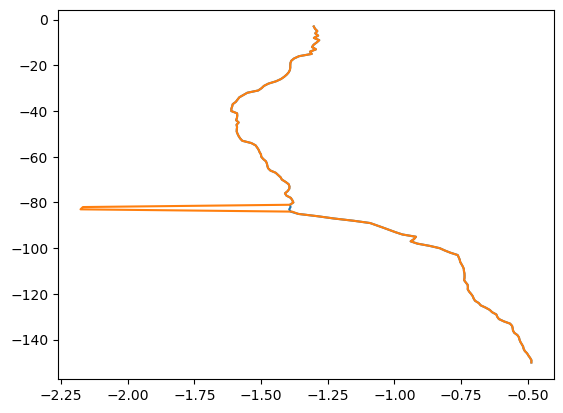

In [349]:
fig, ax = plt.subplots()
ax.plot(n1.TEMP2, -n1.PRES)
ax.plot(n2.TEMP2, -n2.PRES)